# 0. Cargar datos

## 0.0. Datos de notebook
### Sección: FUNDAMENTOS DE MACHINE LEARNING_003D
### Integrantes
- Matias Pérez
- Gabriel Soto

## 0.1. Importamos librerias

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.git', 'column_2C_weka.csv', 'et_ml.ipynb']


## 0.2. Efectúe la carga de los datos(local, no trabajamos desde collab)
### Tambien cambiamos los tipos de datos a float para poder procesarlos con mayor facilidad

In [69]:
name= "column_2C_weka.csv"
df = pd.read_csv(name,sep=";")

paraConvertir = ['incidencia_pelvica', 'inclinacion_pelvica', ' angulo_lordosis_lumbar', 'pendiente_sacra', 'radio_pelvico', 'grado_espondilolistesis']

def ConvertirAFloat(df, columna):
    df[columna] = df[columna].str.replace(',', '.').astype(float)
    return df

for columna in paraConvertir:
    df = ConvertirAFloat(df, columna)

df.head(10)

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis,clase
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Anormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Anormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Anormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Anormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Anormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Anormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Anormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Anormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Anormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Anormal


## 0.3. Presente información acerca de los tipos de datos de las variables

In [76]:
# Presente información acerca de los tipos de datos de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   incidencia_pelvica       310 non-null    float64
 1   inclinacion_pelvica      310 non-null    float64
 2    angulo_lordosis_lumbar  310 non-null    float64
 3   pendiente_sacra          310 non-null    float64
 4   radio_pelvico            310 non-null    float64
 5   grado_espondilolistesis  310 non-null    float64
 6   clase                    310 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 15.9 KB


# 1. Analisis exploratorio de los datos (EDA)

## 1.1. Verificar que la columna Clase sólo tenga las categorías Normal y Anormal

In [70]:
df_clase = df[df['clase'].isin(['Anormal', 'Normal'])]
df_clase['clase'].value_counts()

clase
Anormal    210
Normal     100
Name: count, dtype: int64

<span style="color:lime">Podemos notar que entre las 2 clases existen 310 casos, los cuales 210 son anormales y 100 son normales</span>

## 1.2. Efectúe Análisis de Valores Perdidos (missing values) y corríjalos, si procede.
 

In [77]:
df.isnull()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis,clase
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
305,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False


In [79]:
df.isnull().sum()

incidencia_pelvica         0
inclinacion_pelvica        0
 angulo_lordosis_lumbar    0
pendiente_sacra            0
radio_pelvico              0
grado_espondilolistesis    0
clase                      0
dtype: int64

<span style="color:lime">No existen valores perdidos (missing values) o nulos, por lo que no hay necesidad de corregir</span> 

## 1.3.  Presente mediante un heatmat con el estado de las columnas para verificar la corrección aplicada a los valores perdidos, si procede.

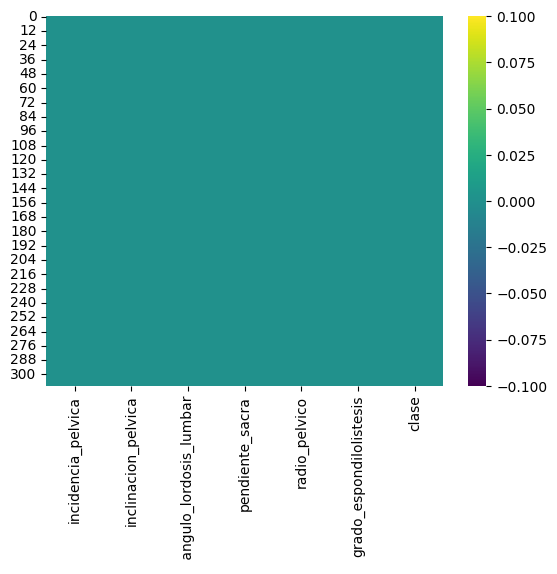

In [80]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()

<span style="color:lime">Podemos apreciar que no existen valores perdidos en el dataset, ya que todos los campos se encuentran en el rango de color celest, lo que indica que no hay valores perdidos.</span>.

<span style="color:lime"></span> 

## 1.4. Presente los valores estadísticos descriptivos de las columnas del dataframe

In [74]:
df.describe()

,incidencia_pelvica,inclinacion_pelvica,angulo_lordosis_lumbar,pendiente_sacra,radio_pelvico,grado_espondilolistesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## 1.5.1. Presente histograma de cada una de las variables


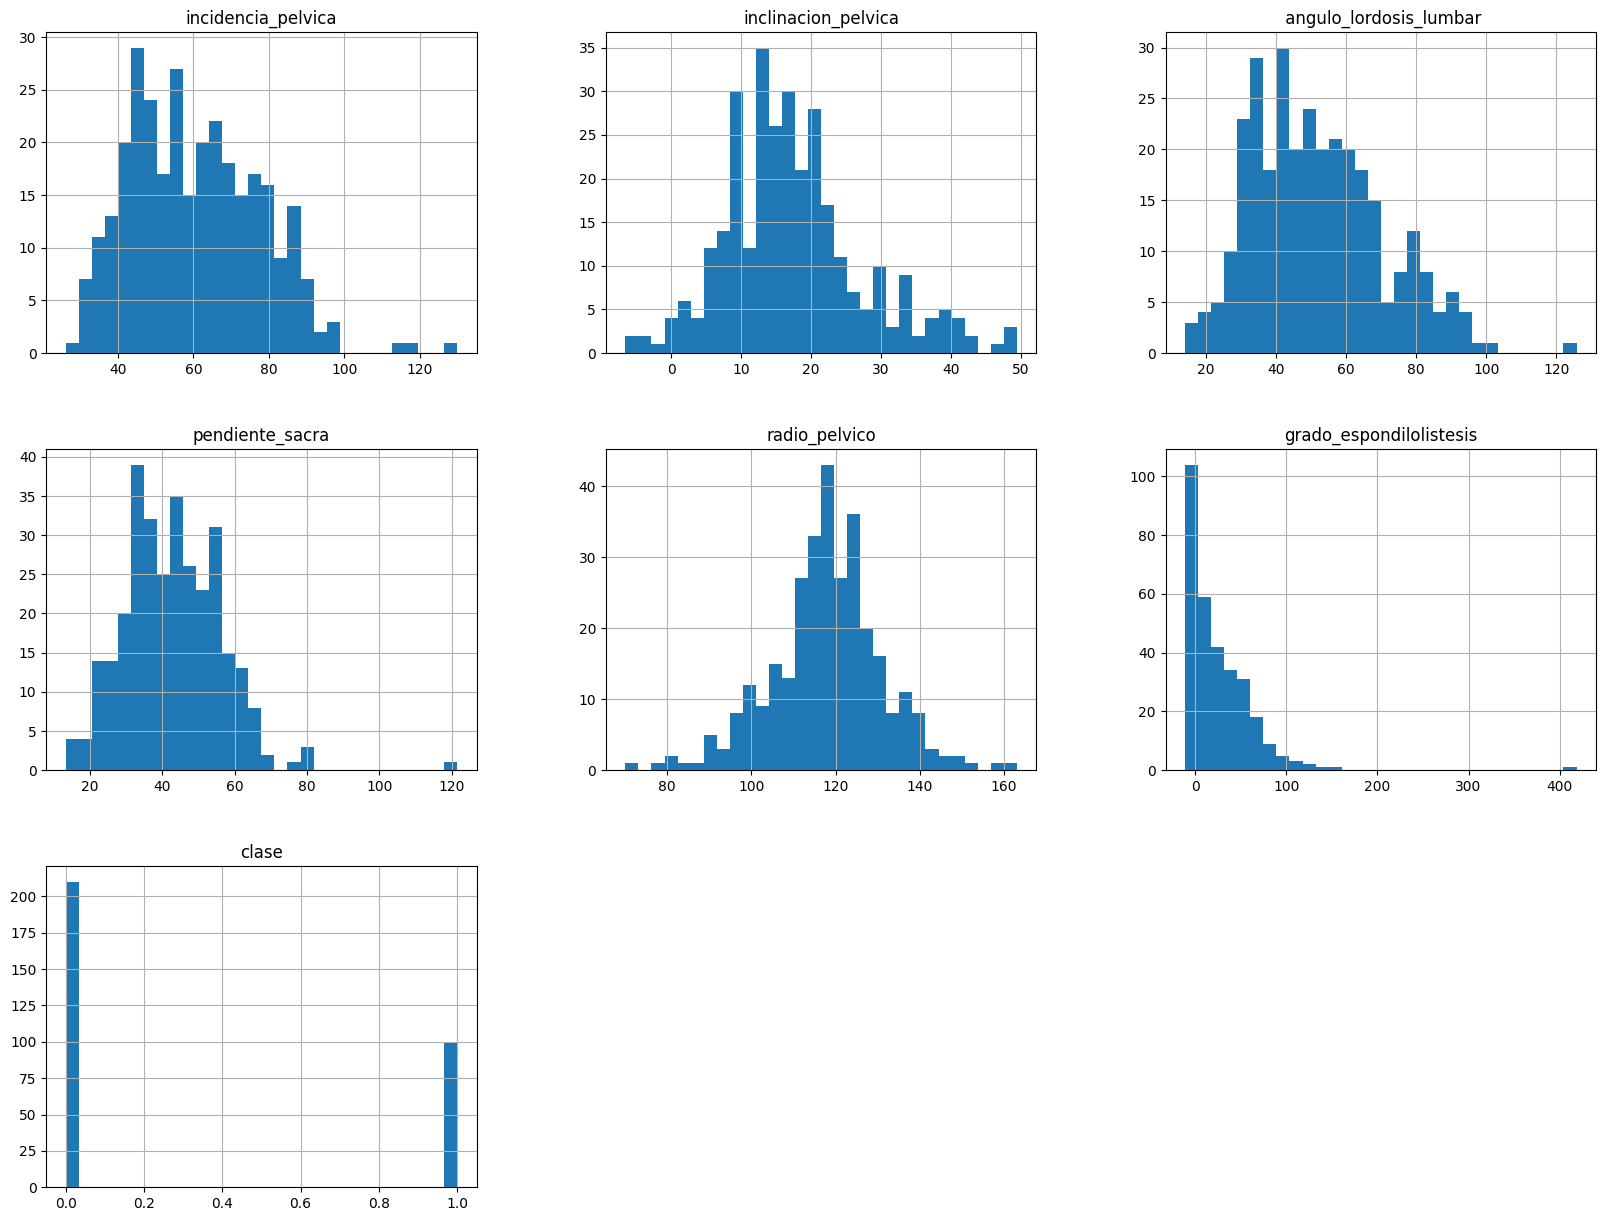

In [75]:
from sklearn.preprocessing import LabelEncoder

for columna in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[columna] = le.fit_transform(df[columna])

df.hist(bins=30, figsize=(20,15))
plt.show()

# 2. Analisis

# 3. Preparación 

# 4. Para cada Modelo (regresión logística, árbol de decisión, bosques de árboles

# 5. Evaluación de los Modelos